**Student name: Đinh Vũ Ngọc Linh**

**Student ID: ITDSIU21095**

# Problem 1:

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### a.

In [2]:
df = pd.read_csv('1.19.txt', sep = '\s+')
df.head()
# Y = GPA
# X = ACT

,Y,X
0,3.897,21
1,3.885,14
2,3.778,28
3,2.540,22
4,3.028,21


In [3]:
X = df['X']
Y = df['Y']
X_bar = np.mean(X)
Y_bar = np.mean(Y)
X_err = X - X_bar
Y_err = Y - Y_bar
print(X_bar, Y_bar)
X_err.head()

24.725 3.0740500000000006


0    -3.725
1   -10.725
2     3.275
3    -2.725
4    -3.725
Name: X, dtype: float64

In [4]:
A = np.sum(X_err*Y_err)
B = np.sum(X_err**2)
print(A,'\n',B)

92.40565 
 2379.925


In [5]:
b1 = A / B
b0 = Y_bar - b1*X_bar
print(b1, b0)

0.038827126905259614 2.1140492872674566


In [6]:
X_hat = 28
n = len(X)
Y_hat = b0 + b1* X_hat
resid = Y - Y_hat
print(np.sum(resid))
print((np.sum((resid - np.mean(resid))**2)))
print(np.var(resid, ddof=1)*(n-1))

-15.259060873767076
49.405453699999995
49.4054537


In [7]:
SSE = np.sum((Y - Y_hat)**2)
MSE = SSE / (n-2)
print(MSE, "\n", SSE)

0.43513371347099783 
 51.34577818957774


In [8]:
s2_Yh= MSE * (1/n + ((X_hat-X_bar)**2)/sum(((X-X_hat)**2)))
s_Yh = np.sqrt(s2_Yh)
print(s2_Yh,'\n' ,s_Yh)

0.004898838859112428 
 0.06999170564511503


In [9]:
t = stats.t.ppf(q = 1- 0.05/2, df=n-2)
t

1.9802722492407059

In [10]:
L = Y_hat - t * s_Yh
U = Y_hat + t * s_Yh
print('L =',L)
print('U =',U)

L = 3.0626062082486802
U = 3.339811472980771


**95 percent interval estimate of the mean freshman GPA for students whose 
ACT test score is 28 that is between 3.06 and 3.34**

### b.

In [11]:
s2_pred = MSE + s2_Yh
s_pred = np.sqrt(s2_pred)
s_pred

0.6633494948593164

In [12]:
L2 = Y_hat - t * s_pred
U2 = Y_hat + t * s_pred
print('L =',L2)
print('U =',U2)

L = 1.8875962443969811
U = 4.51482143683247


**Mary Jones freshman GPA 
using a 95 percent prediction interval that is between 1.9 and 4.5**

### c.
**The prediction interval is larger than the confidence interval and that is expected because the variance of the prediction interval is larger and therefore the interval should be wider.**

### d.

In [13]:
W2 =2* stats.f.ppf(q = 1- 0.05,dfn = 2, dfd=n-2)
W2

6.146180682334335

In [14]:
W = np.sqrt(W2)
W

2.4791491851710608

In [15]:
L3 = Y_hat - A * s_Yh
U3 = Y_hat + A * s_Yh
print('L =',L3)
print('U =',U3)

L = -3.2664202141307976
U = 9.668837895360248


**Confident band when Xh= 28: 3.027688960595906 and 3.3747287206335455**

No, the confident band is a bit wider  at this point Xh = 28 than the confident interval in part (a) because it is not just presenting the confidence intervals at a single Xh, it is presenting the confidence intervals for entire regression line.

# Problem 2:

### a.

In [16]:
df1 = pd.read_csv('CH01PR28.txt', sep='\s+', header=None, names=['crime_rate', 'percentage'])
df1.head()
# Y = crime rate
# X = percentage

,crime_rate,percentage
0,8487,74
1,8179,82
2,8362,81
3,8220,81
4,6246,87


In [17]:
X1 = df1['percentage']
Y1 = df1['crime_rate']
X1_bar = np.mean(X1)
Y1_bar = np.mean(Y1)
X1_err = X1 - X1_bar
Y1_err = Y1 - Y1_bar
print(X1_bar, Y1_bar)
X1_err.head()

78.5952380952381 7111.202380952381


0   -4.595238
1    3.404762
2    2.404762
3    2.404762
4    8.404762
Name: percentage, dtype: float64

In [18]:
A1 = np.sum(X1_err*Y1_err)
B1 = np.sum(X1_err**2)
print(A,B)

92.40565 2379.925


In [19]:
b1_2 = A1 / B1
b0_2 = Y1_bar - b1_2*X1_bar
print(b1_2, b0_2)

-170.57518863868833 20517.599945150243


In [20]:
model = smf.ols('Y1 ~ X1', data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     16.83
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           9.57e-05
Time:                        22:49:06   Log-Likelihood:                -770.43
No. Observations:                  84   AIC:                             1545.
Df Residuals:                      82   BIC:                             1550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.052e+04   3277.643      6.260      0.000     1.4e+04     2.7e+04
X1          -170.5752     41.574     -4.103      0.000    -253.280     -87.871
==============================================================================
Omnibus:                        2.224   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                2.229
Skew:                           0.360   Prob(JB):                        0.328
Kurtosis:                       2.655   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

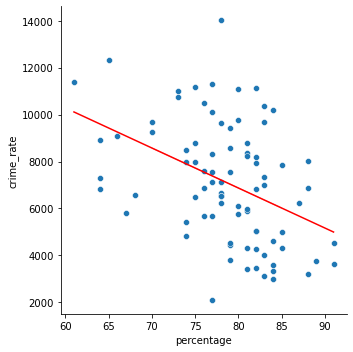

In [21]:
sns.relplot(x='percentage', y='crime_rate', data=df1)

sns.lineplot(x=X1, y=b0_2+b1_2*X1, color='red')
sns.lineplot(x=X1, y=L_d, color='red')
plt.show()

### b.

In [22]:
n1 = len(X1)
Y1_hat = b0_2 + b1_2* X1
resid1 = Y1 - Y1_hat
print(np.sum(resid1))
print((np.sum((resid1 - np.mean(resid1))**2)))
print(np.var(resid1, ddof=1)*(n1-1))

-5.093170329928398e-11
455273165.2925345
455273165.2925346


In [23]:
SSE_1 = np.sum((Y1 - Y1_hat)**2)
MSE_1 = SSE_1 / (n1-2)
print(MSE_1, SSE_1)

5552111.771860177 455273165.2925345


In [24]:
s2_b1_2= MSE_1/ B1
s_b1_2 = np.sqrt(s2_b1_2)
s_b1_2

41.57432781088715

In [25]:
t1 = stats.t.ppf(q = 1- 0.02/2, df=n1-2)
t1


2.3726873452471393

In [26]:
t_star = b1_2/s_b1_2
t_star

-4.1028970910750235

**Thus, |t_star| = 4.102 > t = 2.372, so we conclude Ha.**

### c.

In [27]:
SSTO_1 = np.sum((Y1 - Y1_bar)**2)
print(SSTO_1)

548736107.5595237


In [28]:
R2 = 1 - SSE_1/SSTO_1
R2

0.17032402457104745

**The coefficient of determination R-square is 0.1703**

### d.

In [29]:
t2 = stats.t.ppf(q = 1-0.05/2, df= n1 -2)
t2

1.9893185569368186

In [30]:
L_d = b1_2 - t2* s_b1_2
U_d = b1_2 + t2* s_b1_2
print('L=',L_d)
print('U=',U_d)

L= -253.2797704450606
U= -87.87060683231607


**We can conclude that the 95% confidence interval on the slope is from -253.28 to -87.87.**

With confidence coefficient .95, we estimate that the mean Crime rate purity increases by somewhere between -253.28 and -87.87 for every each point increase in n the percentage of individuals in the county having at least a high-school diploma

### e.

In [31]:
Xh_2 = 75
Y1_hat2 = b0_2 + b1_2* Xh_2
Y1_hat2

7724.460797248617

In [32]:
SSE_2 = np.sum((Y1 - Y1_hat2)**2)
MSE_2 = SSE_2 / (n1-2)
print(MSE_2, SSE_2)

7077162.462351341 580327321.91281


In [33]:
s2_Yh_1= MSE_2 * (1/n1 + ((Xh_2-X1_bar)**2)/sum(((X1-X1_bar)**2)))
s_Yh_1 = np.sqrt(s2_Yh_1)
print(s2_Yh_1,'\n' ,s_Yh_1)

112729.75474445238 
 335.752520086525


In [34]:
t_2 = stats.t.ppf(q = 1- 0.05/2, df=n-2)
t_2

1.9802722492407059

In [35]:
L_2 = Y1_hat2 - t_2*s_Yh_1
U_2 = Y1_hat2 + t_2*s_Yh_1
print('L =',L_2)
print('U =',U_2)

L = 7059.579399108639
U = 8389.342195388595


**With the 95% confidence interval for the mean Crime rate purity when the percentage of individuals in the county having at least a high-school diploma is 75% that is between 7059.58 and 8389.34**

For the population of all medium-sized counties in which 75% of individuals in the county having at least a high-school diploma, we are 95% certain that the mean Crime rate purity was between 7059 and 8389
